# Protein Pow(d)er

A protein is a chain of amino acids. An amino acid can be **polair ('P')** or **hydrophobe ('H')**. Each amino acid is placed on a point on a grid. The amino acid chain can fold in angles of 90 degrees on the grid. The stability of the protein fold can be assessed with its **stability score**. For each H-bond (two unconnected hydrophobe amino acids next to each other on the grid) the stability score is decreased by 1. The lowest stability score signals the most stable protein folding. 

<font color='purple'>Why does the score decrease and not increase?</font> <br> Because the best stability score shows the lowest energy state of an protein.

Finding the most stable protein folding is a **constrained optimization problem**. Firstly, it is an optimization problem because not every folding/solution is equally good. In contrary, solutions are scored with a stability score. Secondly, the problem is constrained because amino acids cannot overlap on the grid.

<font color='red'>The stability score has to be calculated using a **score function**.</font>

The amount of possible foldings/solutions of a protein can be estimated with a **complexity function**. Each amino acid can fold into three positions. So $n$ amino acids can fold in $3^n$ positions. Expect for the first two amino acids in the protein, which orientation is not relevant. This gives us $3^{n-2}$ possible solutions in our **state space**. <font color='red'>However, our state space should be smaller since amino acids cannot overlap on the grid and some solutions might be mirrored/turned.</font>

In [23]:
def complexity(n):
    return 3**(n - 2)

The protein can be represented in a Protein class, which stores the amino acid sequence, the length of the amino acid chain, the grid on which the protein will be folded and its stability score. The Protein class also has a subclass AA, which stores the type of amino acid and the position of the amino acid in its chain.

In [2]:
class Protein:
    class AA:
        aa = None
        i = None
        # up down left right
        direc = None
        
    def __init__(self, chain):
        # chain is string of amino acid sequence
        self.chain = chain
        # n is amount of amino acids in protein chain
        self.n = len(self.chain)
        # create a grid of 2n x 2n (can later expand to 3D)
        self.grid = [[self.AA() for y in range(2*self.n)] for x in range(2*self.n)]
        # stability score is calculated with score function
        self.score = self.score()
    
    # still needs to be implemented in Score_function.ipynb
    def score(self):
        score = 0
        return score

In [11]:
protein = Protein("HHPHHHPH")
print protein.chain
print protein.n
print protein.score
print protein.AA.aa
print protein.AA.i

HHPHHHPH
8
0
None
None


In [19]:
def fold(protein):
    # iterate over amino acids c = column
    for c in range(protein.n):
        # fold protein straight down
        protein.grid[0][c].aa = protein.chain[c]
        protein.grid[0][c].i = c

In [21]:
fold(protein)
print protein.grid[0][0].aa

H


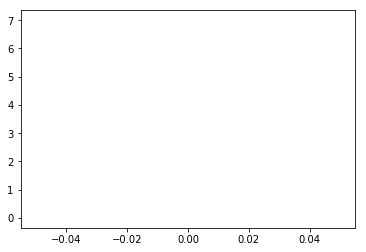

In [22]:
import matplotlib.pyplot as plt

# iterate of grid rows
for r in range(protein.n):
    # iterate over grid columns
    for c in range(protein.n):
        if protein.grid[r][c].i is not None:
            if protein.grid[r][c].aa == 'H':
                color = 'red'
            else:
                color = 'blue'
                
            plt.plot(r, c, color=color)
            
plt.show()

* hill climber
* assimilated annealing